Libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as pl
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**I am conducting separate analyses for both datasets provided to me.**

**Load data**

1.   benin-malanville




In [49]:
benin_df = pd.read_csv("/content/drive/MyDrive/10Academy/benin-malanville.csv")
benin_df.head(3)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN


Data Quality Check

In [50]:
missing = benin_df.isnull().sum()
missing

,0
Timestamp,0
GHI,0
DNI,0
DHI,0
ModA,0
ModB,0
Tamb,0
RH,0
WS,0
WSgust,0


**Check for Negetive values**

In [51]:
mask = (benin_df['GHI'] >= 0) & (benin_df['DNI'] >= 0) & (benin_df['DHI'] >= 0)
if mask.all():
    print("No negative values found")
else:
    print("Negative values found")

Negative values found


Mask out positive values for ***'GHI', 'DNA' and 'DHI'***

In [52]:
positive_values = benin_df[(benin_df['GHI'] >= 0) &
                            (benin_df['DNI'] >= 0) &
                            (benin_df['DHI'] >= 0)]

benin_df = positive_values

**Check for Outliers**

In [53]:
benin_df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

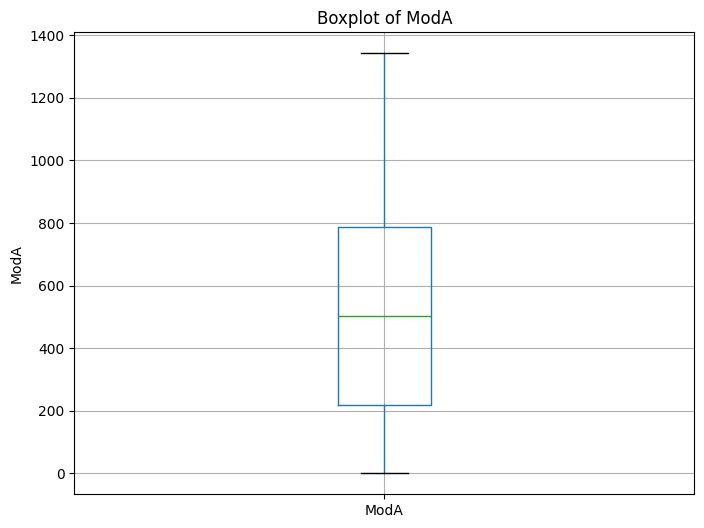

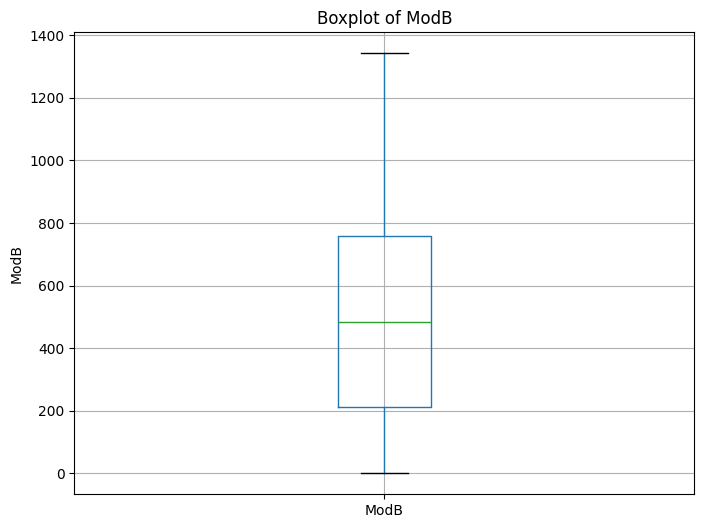

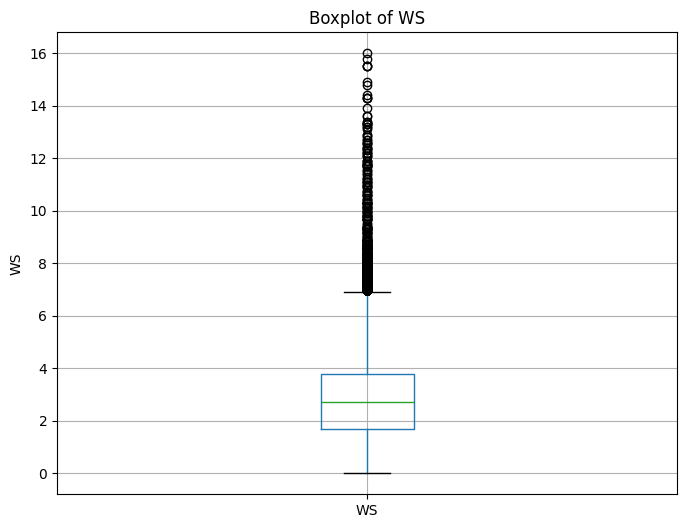

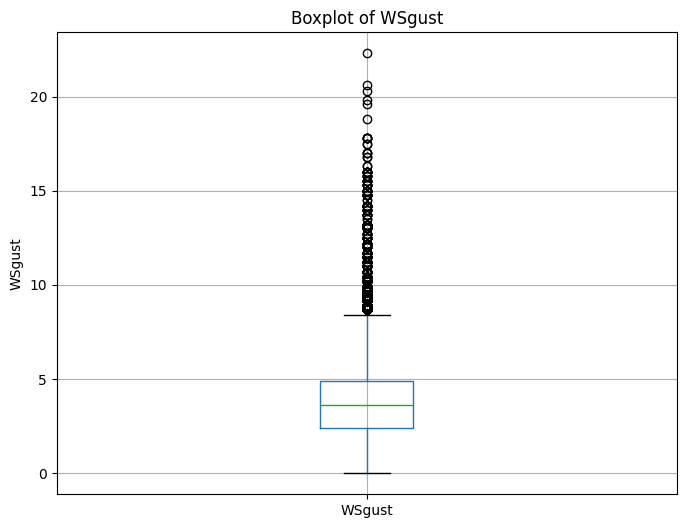

In [54]:
import matplotlib.pyplot as plt

#maskout colomuns
cols_to_check = ['ModA', 'ModB', 'WS', 'WSgust']

# plot out
for col in cols_to_check:
    plt.figure(figsize=(8, 6))
    benin_df.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

Detect Outliers

In [58]:
columns = ['ModA', 'ModB', 'WS', 'WSgust']

Q1 = benin_df[columns].quantile(0.25)
Q3 = benin_df[columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove outliers
outliers = benin_df[((benin_df[columns] < lower_bound) | (benin_df[columns] > upper_bound)).any(axis=1)]
#drop outliers
benin_df = benin_df.drop(outliers.index)
benin_df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
413,2021-08-09 06:54,16.7,0.0,16.5,16.1,16.3,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.2,23.7,NaN
414,2021-08-09 06:55,18.2,0.1,18.0,17.4,17.6,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.3,23.8,NaN
415,2021-08-09 06:56,19.7,0.3,19.5,18.7,18.9,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.3,23.9,NaN
416,2021-08-09 06:57,21.1,0.6,20.9,19.9,20.1,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.4,23.9,NaN
417,2021-08-09 06:58,22.5,1.1,22.2,21.1,21.3,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.5,24.0,NaN


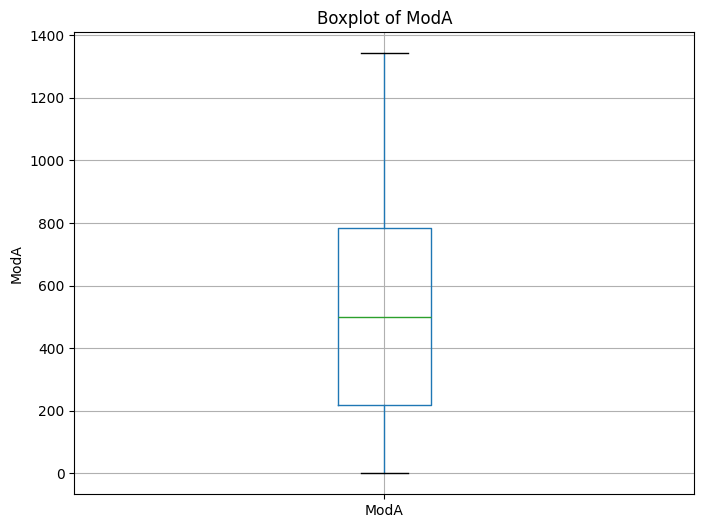

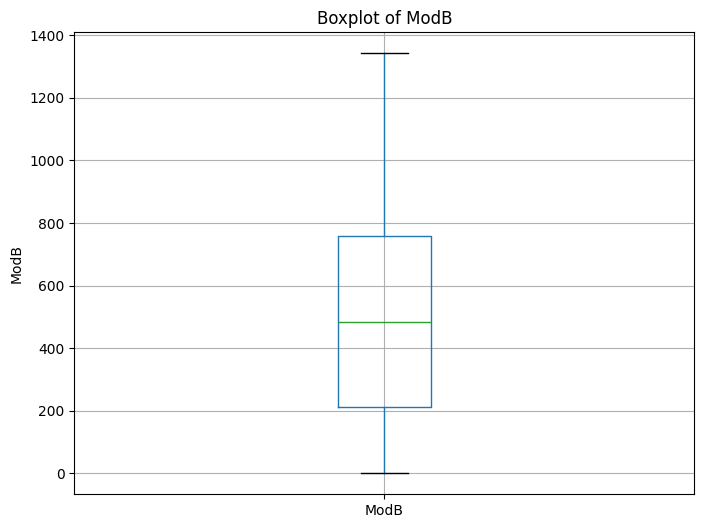

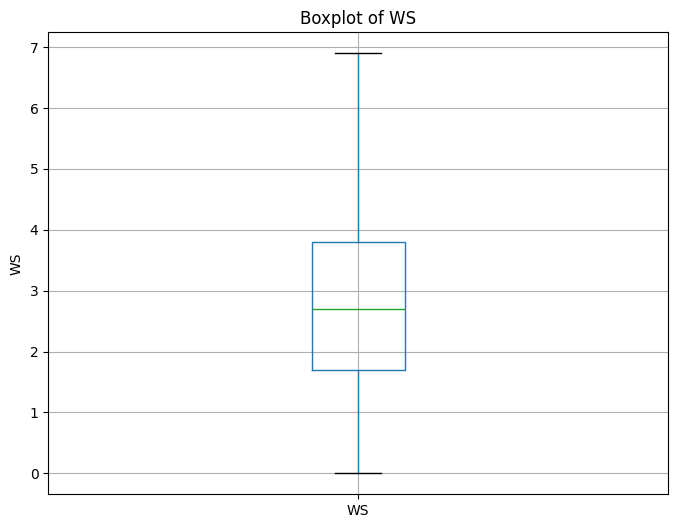

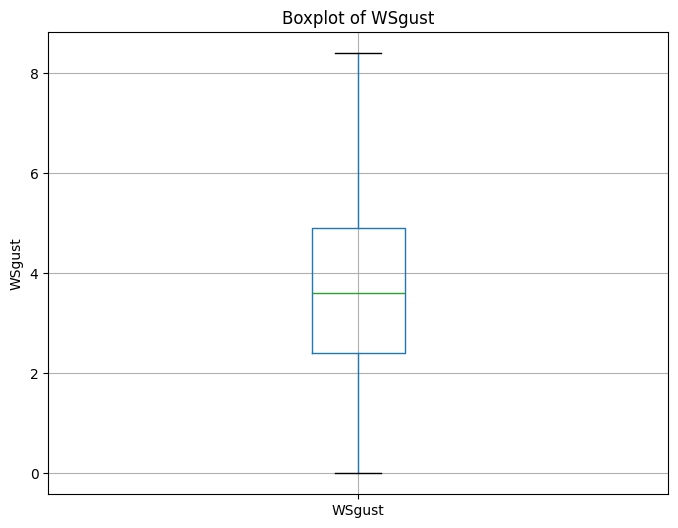

In [59]:
import matplotlib.pyplot as plt

#maskout colomuns
cols_to_check = ['ModA', 'ModB', 'WS', 'WSgust']

# plot out
for col in cols_to_check:
    plt.figure(figsize=(8, 6))
    benin_df.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

**Time Series analysis**

In [67]:
benin_df.columns

Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments'],
      dtype='object')

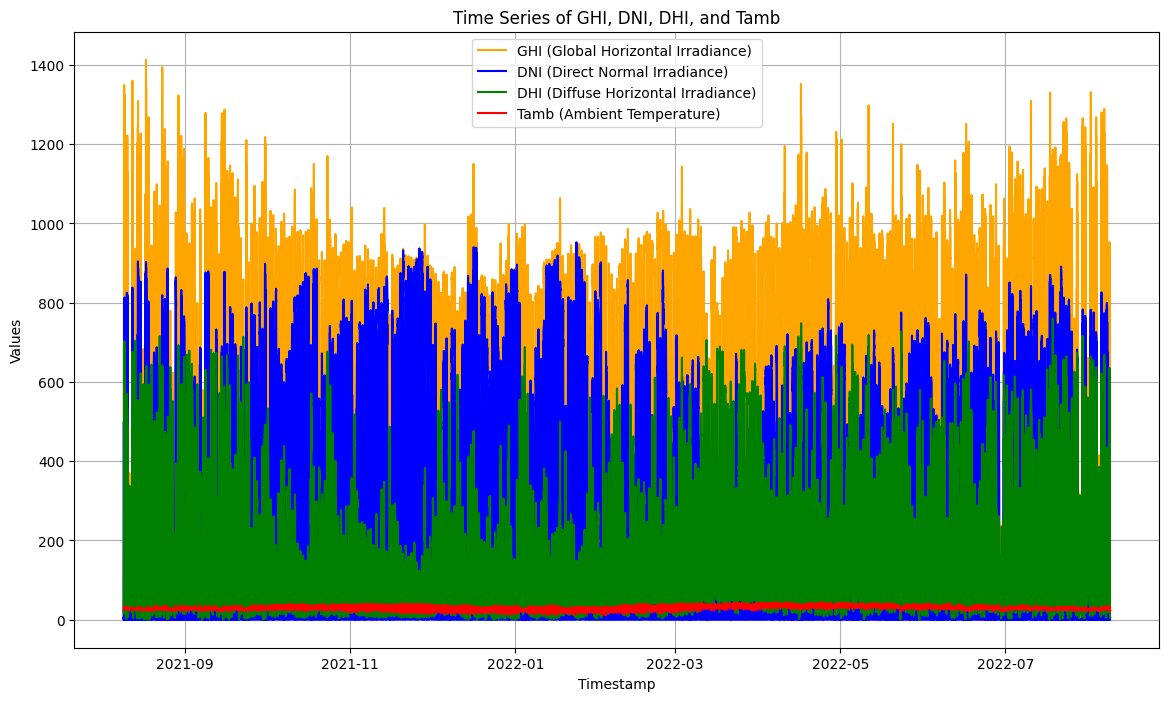

In [69]:
# Plotting GHI, DNI, DHI, and Tamb
plt.figure(figsize=(14, 8))
plt.plot(benin_df['GHI'], label='GHI (Global Horizontal Irradiance)', color='orange')
plt.plot(benin_df['DNI'], label='DNI (Direct Normal Irradiance)', color='blue')
plt.plot(benin_df['DHI'], label='DHI (Diffuse Horizontal Irradiance)', color='green')
plt.plot(benin_df['Tamb'], label='Tamb (Ambient Temperature)', color='red')
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

**Evaluate Cleaning**

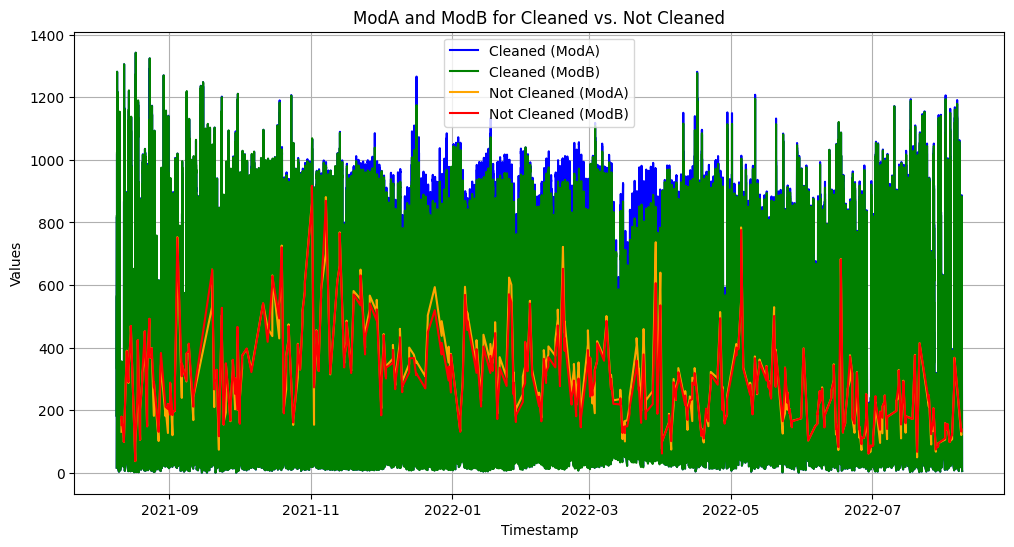

In [77]:
benin_df.Cleaning.unique()

Cleaned = benin_df[benin_df['Cleaning'] == 0]
No_cleaned = benin_df[benin_df['Cleaning'] == 1]

# Plotting average ModA and ModB for cleaned vs. not cleaned
plt.figure(figsize=(12, 6))
plt.plot(Cleaned['ModA'], label='Cleaned (ModA)', color='blue')
plt.plot(Cleaned['ModB'], label='Cleaned (ModB)', color='green')
plt.plot(No_cleaned['ModA'], label='Not Cleaned (ModA)', color='orange')
plt.plot(No_cleaned['ModB'], label='Not Cleaned (ModB)', color='red')
plt.title('ModA and ModB for Cleaned vs. Not Cleaned')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show();

**Correlation Analysis for Benin dataset**

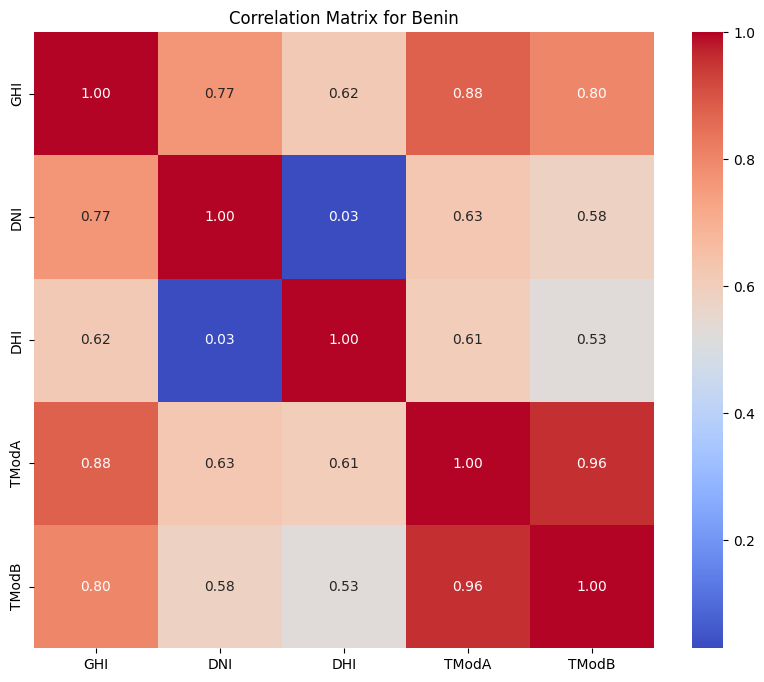

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_data = benin_df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Benin')
plt.show();

**Load data**

2.   sierraleone dataset

In [79]:
sierraleone_df = pd.read_csv("/content/drive/MyDrive/10Academy/sierraleone-bumbuna.csv")
sierraleone_df.head(3)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


**Check Missing values**

In [80]:
missing = sierraleone_df.isnull().sum()
missing

,0
Timestamp,0
GHI,0
DNI,0
DHI,0
ModA,0
ModB,0
Tamb,0
RH,0
WS,0
WSgust,0


Detecting Outlier

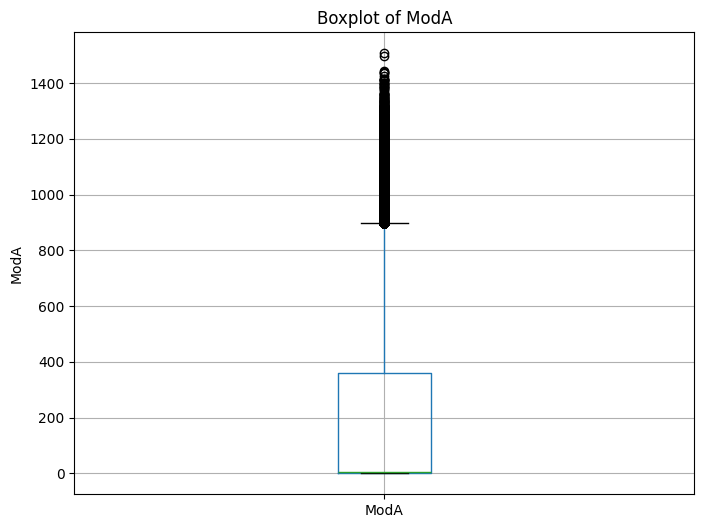

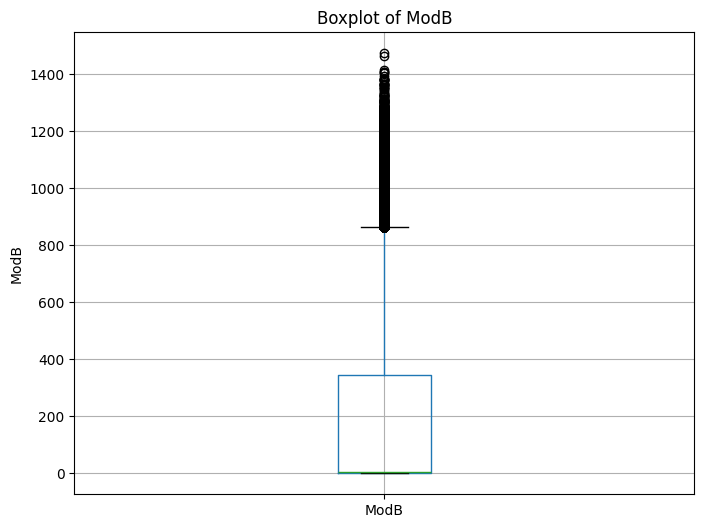

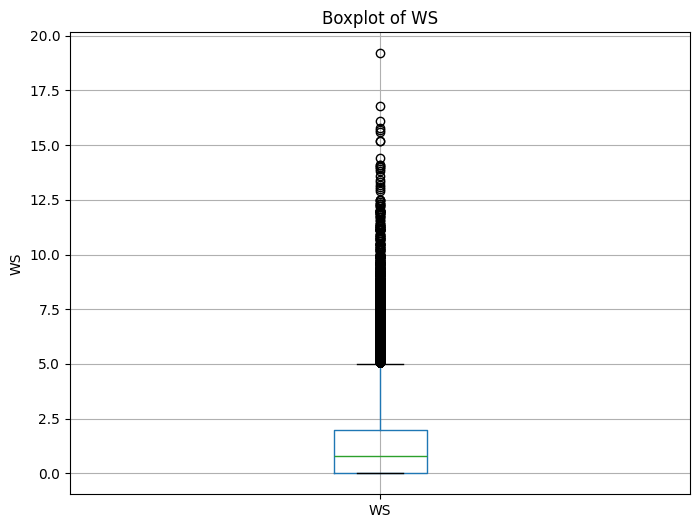

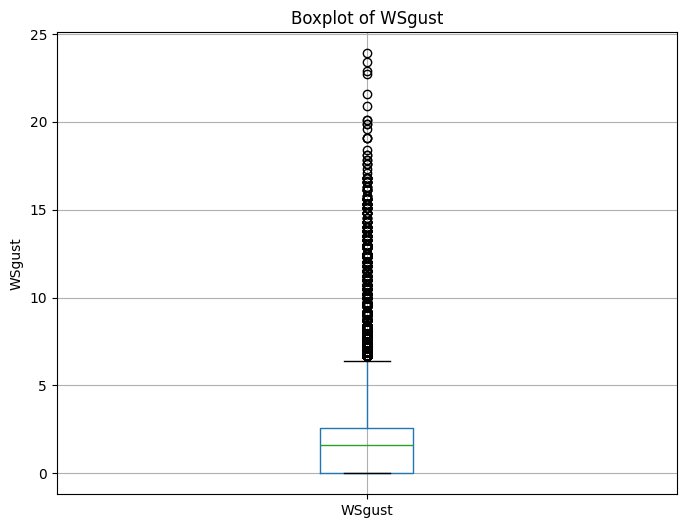

In [81]:
import matplotlib.pyplot as plt

#maskout colomuns
cols_to_check = ['ModA', 'ModB', 'WS', 'WSgust']

# plot out
for col in cols_to_check:
    plt.figure(figsize=(8, 6))
    sierraleone_df.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

Remove

In [82]:
columns = ['ModA', 'ModB', 'WS', 'WSgust']

Q1 = sierraleone_df[columns].quantile(0.25)
Q3 = sierraleone_df[columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove outliers
outliers = sierraleone_df[((sierraleone_df[columns] < lower_bound) | (sierraleone_df[columns] > upper_bound)).any(axis=1)]
#drop outliers
sierraleone_df = sierraleone_df.drop(outliers.index)
sierraleone_df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


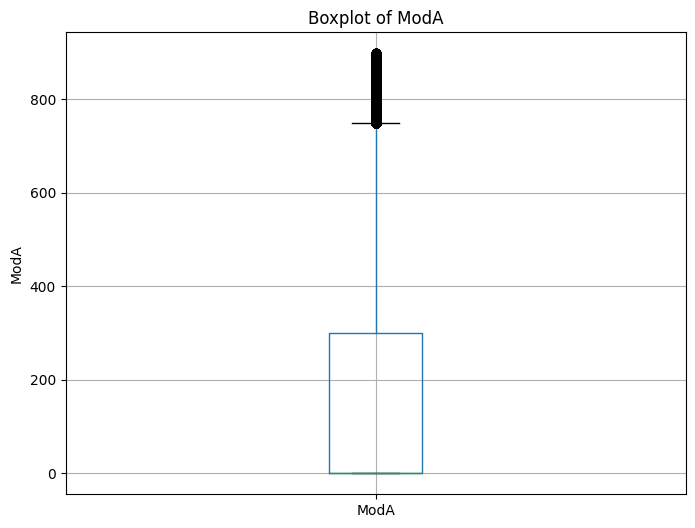

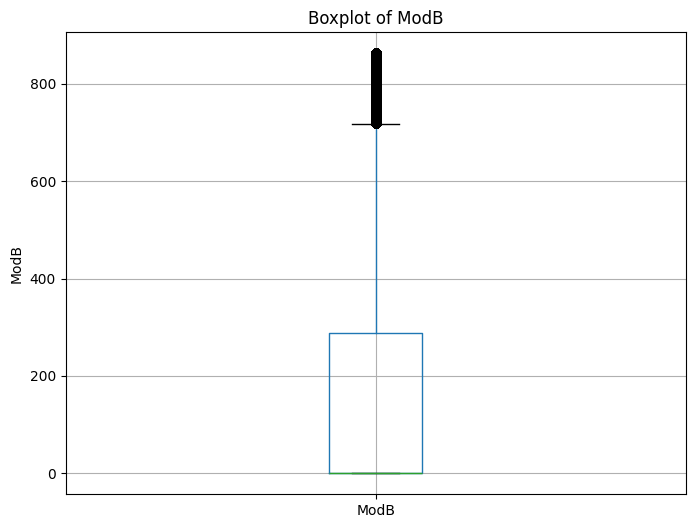

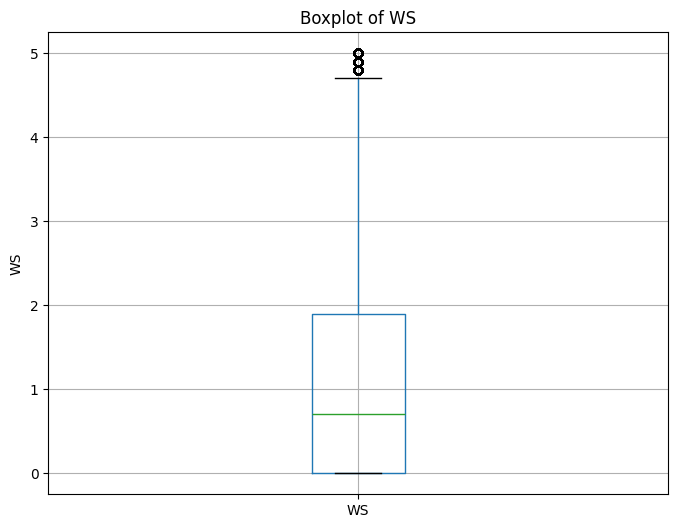

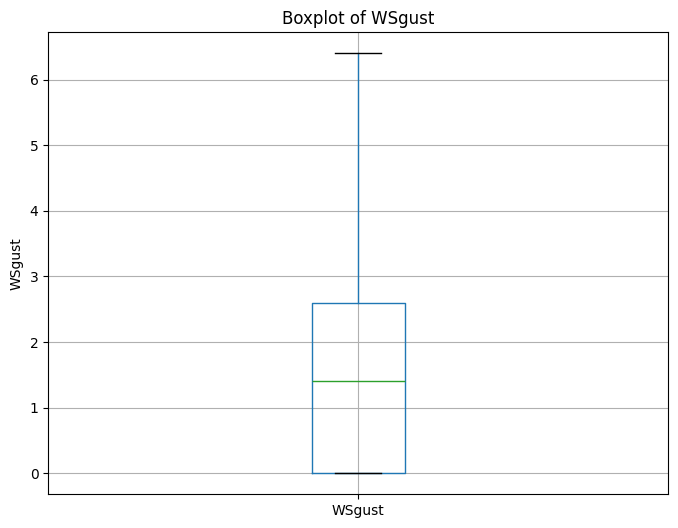

In [83]:
import matplotlib.pyplot as plt

#maskout colomuns
cols_to_check = ['ModA', 'ModB', 'WS', 'WSgust']

# plot out
for col in cols_to_check:
    plt.figure(figsize=(8, 6))
    sierraleone_df.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

Time Series ANalysis for Serrialone

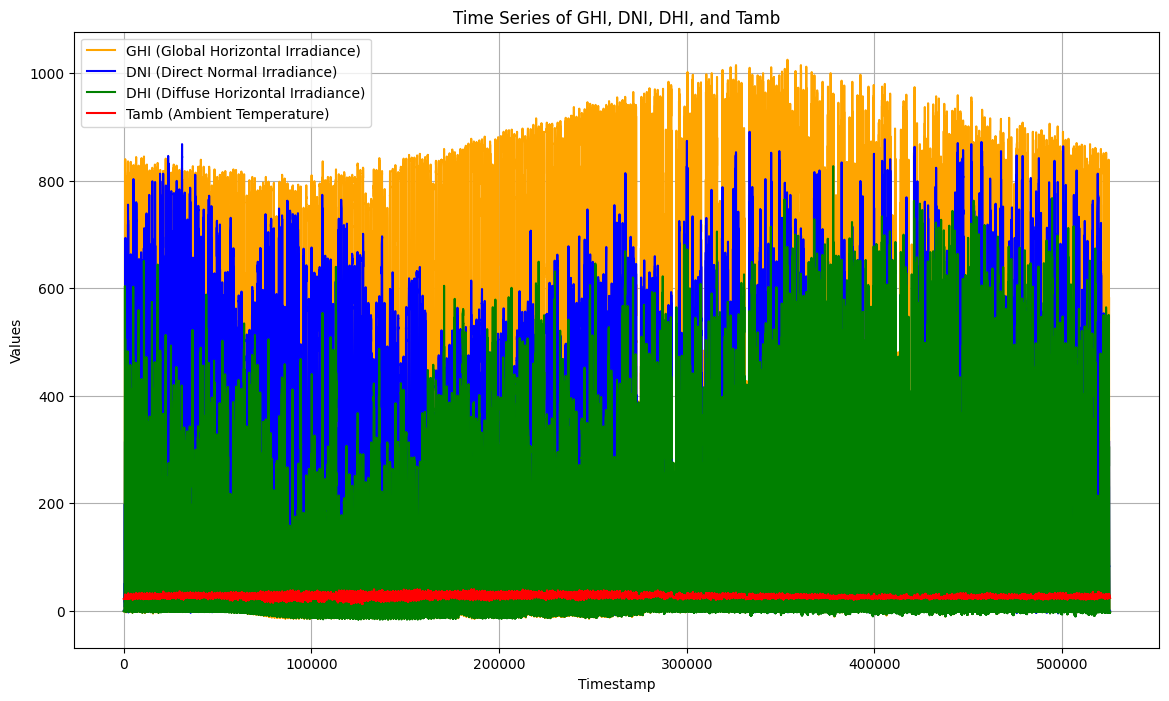

In [85]:
# Plotting GHI, DNI, DHI, and Tamb
plt.figure(figsize=(14, 8))
plt.plot(sierraleone_df['GHI'], label='GHI (Global Horizontal Irradiance)', color='orange')
plt.plot(sierraleone_df['DNI'], label='DNI (Direct Normal Irradiance)', color='blue')
plt.plot(sierraleone_df['DHI'], label='DHI (Diffuse Horizontal Irradiance)', color='green')
plt.plot(sierraleone_df['Tamb'], label='Tamb (Ambient Temperature)', color='red')
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show();



Evaluate Cleaning

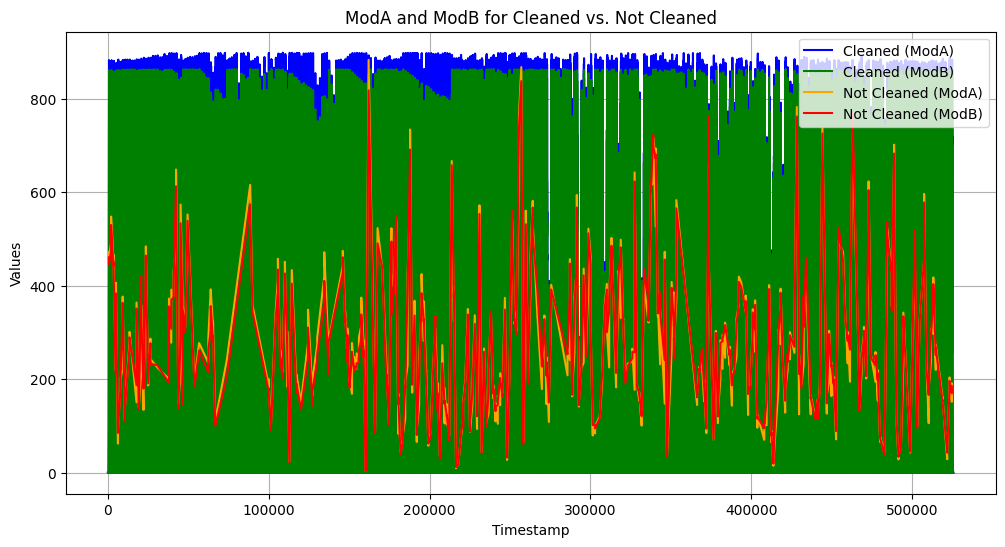

In [90]:
sierraleone_df.Cleaning.unique()

Cleaned = sierraleone_df[sierraleone_df['Cleaning'] == 0]
No_cleaned = sierraleone_df[sierraleone_df['Cleaning'] == 1]

# Plotting average ModA and ModB for cleaned vs. not cleaned
plt.figure(figsize=(12, 6))
plt.plot(Cleaned['ModA'], label='Cleaned (ModA)', color='blue')
plt.plot(Cleaned['ModB'], label='Cleaned (ModB)', color='green')
plt.plot(No_cleaned['ModA'], label='Not Cleaned (ModA)', color='orange')
plt.plot(No_cleaned['ModB'], label='Not Cleaned (ModB)', color='red')
plt.title('ModA and ModB for Cleaned vs. Not Cleaned')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show();

**Correlation Analysis for Serrialone dataset**

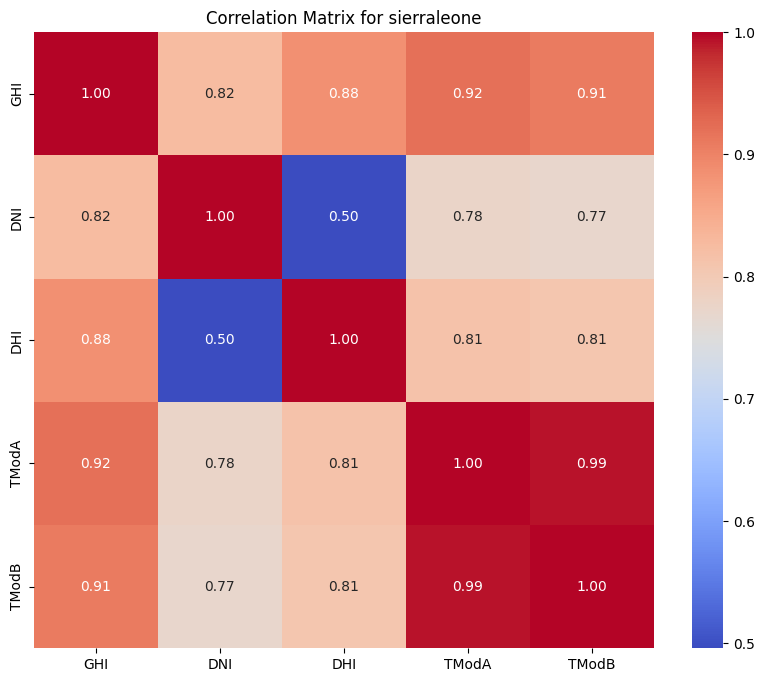

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_data = sierraleone_df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for sierraleone')
plt.show();

Data load
3. Togo

In [20]:
togo_df = pd.read_csv("/content/drive/MyDrive/10Academy/togo-dapaong_qc.csv")
togo_df.head(3)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN


Check Mising for togo

In [21]:
missing = togo_df.isnull().sum()
missing

,0
Timestamp,0
GHI,0
DNI,0
DHI,0
ModA,0
ModB,0
Tamb,0
RH,0
WS,0
WSgust,0


plot boxplot to detect outliers

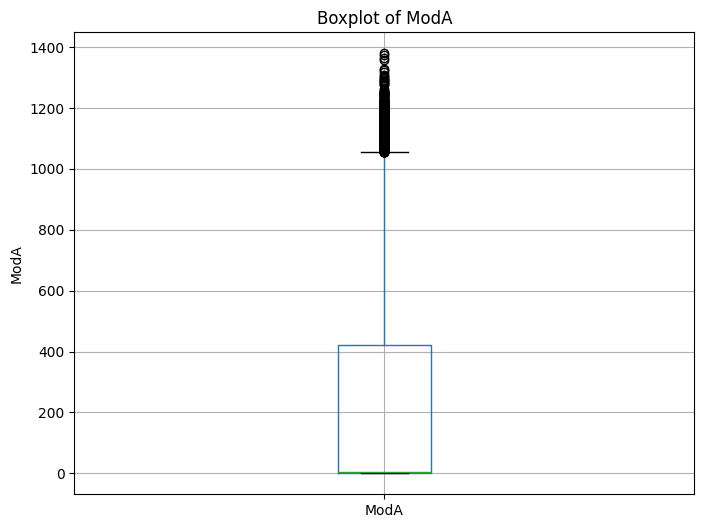

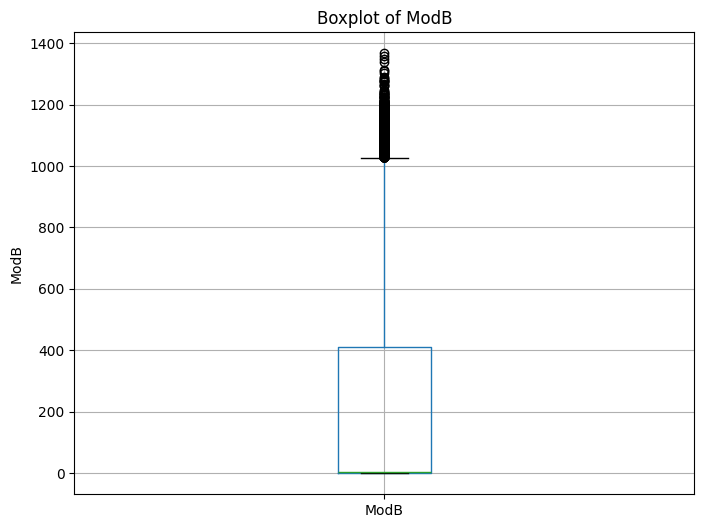

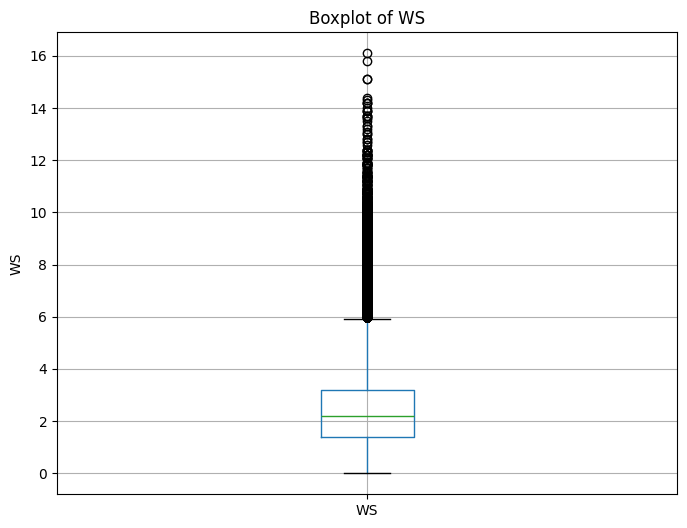

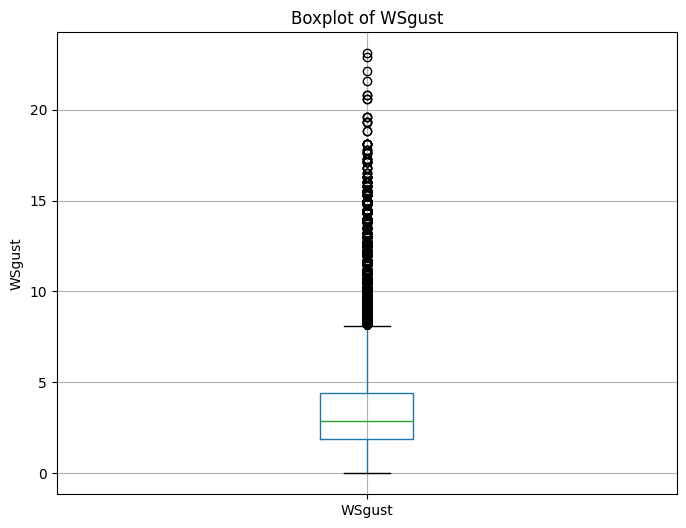

In [22]:
import matplotlib.pyplot as plt

#maskout colomuns
cols_to_check = ['ModA', 'ModB', 'WS', 'WSgust']

# plot out
for col in cols_to_check:
    plt.figure(figsize=(8, 6))
    togo_df.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

Remove using below

In [93]:
columns = ['ModA', 'ModB', 'WS', 'WSgust']

Q1 = togo_df[columns].quantile(0.25)
Q3 = togo_df[columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove outliers
outliers = sierraleone_df[((sierraleone_df[columns] < lower_bound) | (sierraleone_df[columns] > upper_bound)).any(axis=1)]
#drop outliers
sierraleone_df = sierraleone_df.drop(outliers.index)
sierraleone_df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


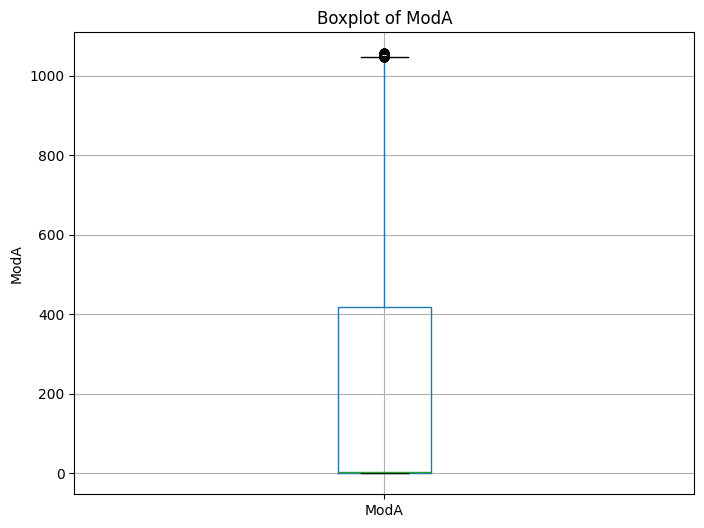

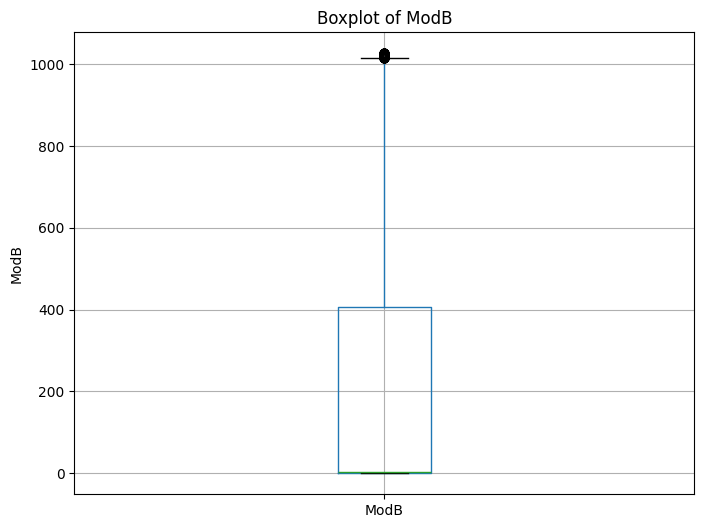

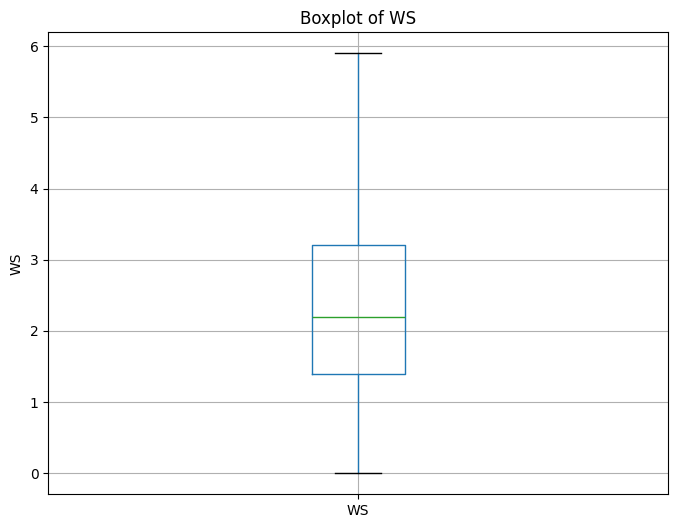

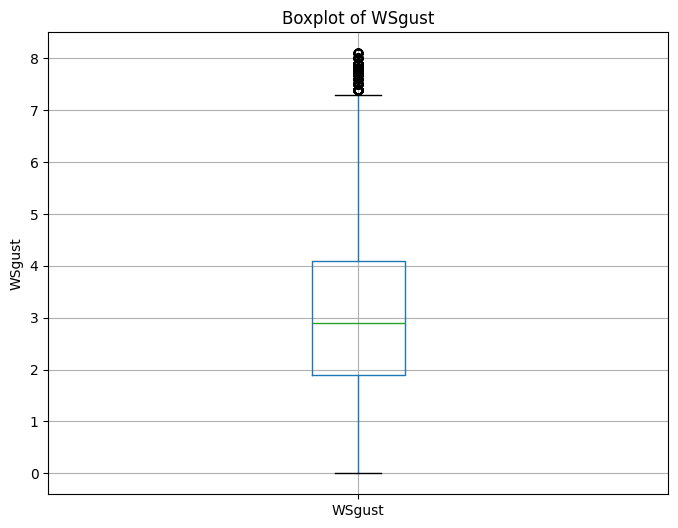

In [94]:
import matplotlib.pyplot as plt

#maskout colomuns
cols_to_check = ['ModA', 'ModB', 'WS', 'WSgust']

# plot out
for col in cols_to_check:
    plt.figure(figsize=(8, 6))
    togo_df.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

Time Series Analysis for Togo data

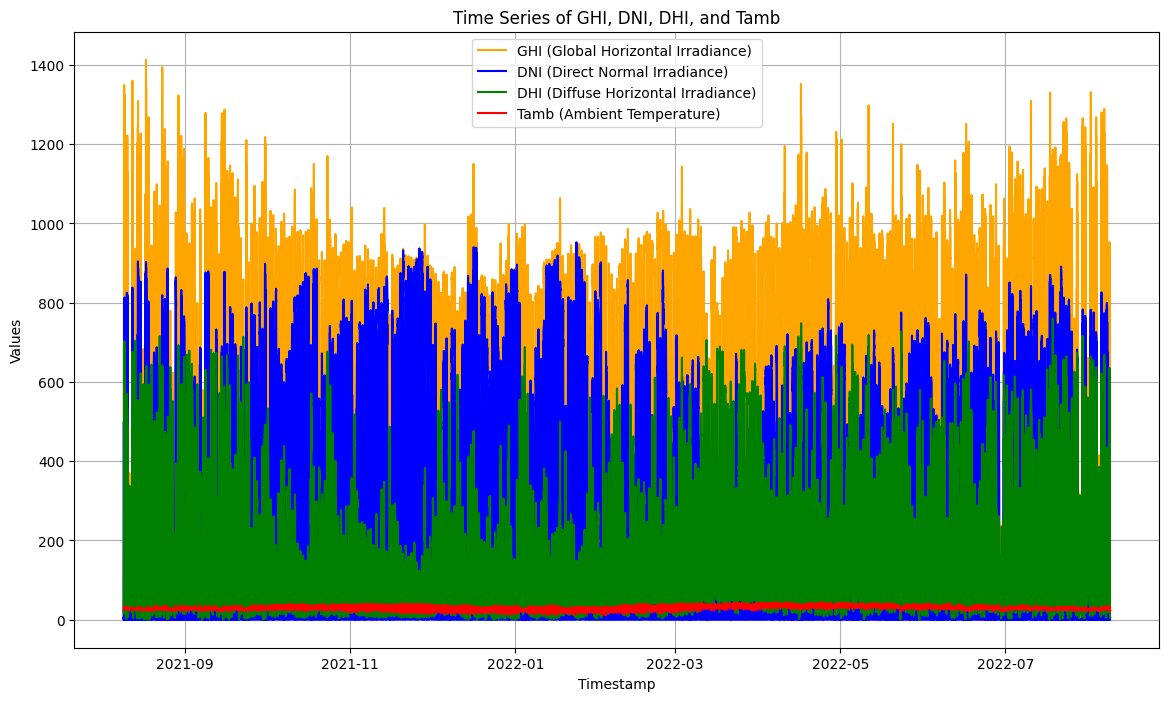

In [95]:
# Plotting GHI, DNI, DHI, and Tamb
plt.figure(figsize=(14, 8))
plt.plot(benin_df['GHI'], label='GHI (Global Horizontal Irradiance)', color='orange')
plt.plot(benin_df['DNI'], label='DNI (Direct Normal Irradiance)', color='blue')
plt.plot(benin_df['DHI'], label='DHI (Diffuse Horizontal Irradiance)', color='green')
plt.plot(benin_df['Tamb'], label='Tamb (Ambient Temperature)', color='red')
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

Evaluate Cleaning


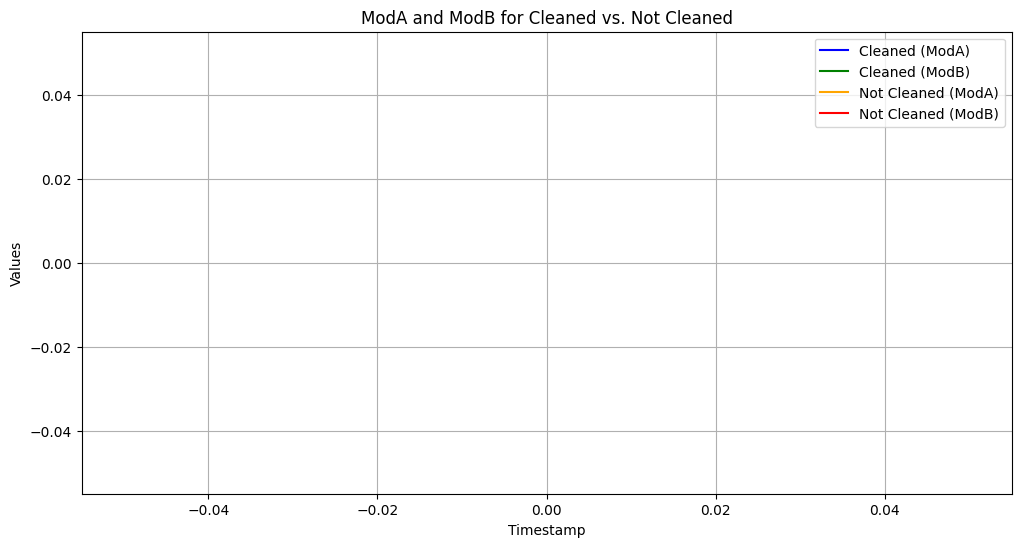

In [92]:
togo_df.Cleaning.unique()

Cleaned = togo_df[togo_df['Cleaning'] == 0]
No_cleaned = togo_df[togo_df['Cleaning'] == 1]

# Plotting average ModA and ModB for cleaned vs. not cleaned
plt.figure(figsize=(12, 6))
plt.plot(Cleaned['ModA'], label='Cleaned (ModA)', color='blue')
plt.plot(Cleaned['ModB'], label='Cleaned (ModB)', color='green')
plt.plot(No_cleaned['ModA'], label='Not Cleaned (ModA)', color='orange')
plt.plot(No_cleaned['ModB'], label='Not Cleaned (ModB)', color='red')
plt.title('ModA and ModB for Cleaned vs. Not Cleaned')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show();

**Correlation Analysis for togo dataset**

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


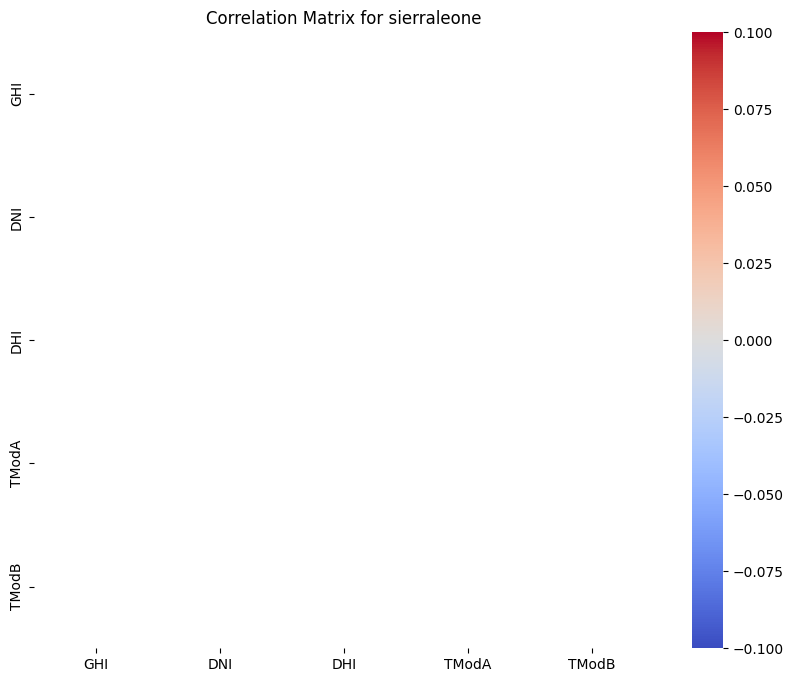

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_data = togo_df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for sierraleone')
plt.show();